In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import statsmodels as sm
import statsmodels.formula.api as smf
from sklearn import linear_model # to get OLS model fit
#from sklearn.preprocessing import Standardizer
%matplotlib inline

In [22]:
df = pd.read_csv("Advertising (1).csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [23]:
df =df.drop('Unnamed: 0', axis = 1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [24]:
df = df[df.radio != 0]
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [25]:
df['TV'] = np.log10(df['TV'])
df['radio'] = np.log10(df['radio'])
df['newspaper'] = np.log10(df['newspaper'])
df['sales'] = np.log10(df['sales'])
df

,TV,radio,newspaper,sales
0,2.361917,1.577492,1.840106,1.344392
1,1.648360,1.594393,1.654177,1.017033
2,1.235528,1.661813,1.840733,0.968483
3,2.180413,1.615950,1.767156,1.267172
4,2.257198,1.033424,1.766413,1.110590
5,0.939519,1.689309,1.875061,0.857332
6,1.759668,1.515874,1.371068,1.071882
7,2.079904,1.292256,1.064458,1.120574
8,0.934498,0.322219,0.000000,0.681241
9,2.300595,0.414973,1.326336,1.025306


In [26]:
df.isnull().any()

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

Text(0,0.5,'sales')

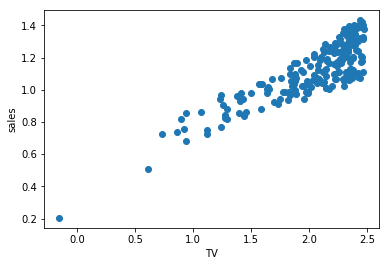

In [27]:
plt.plot(df.TV, df.sales,ls ='', marker='o',)
plt.xlabel("TV") # x-axis
plt.ylabel("sales") # y-axis

Text(0,0.5,'sales')

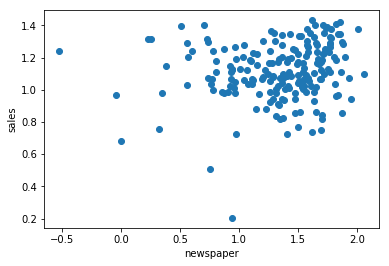

In [28]:
plt.plot(df.newspaper, df.sales,ls ='', marker='o',)
plt.xlabel("newspaper") # x-axis
plt.ylabel("sales") # y-axis

Text(0,0.5,'sales')

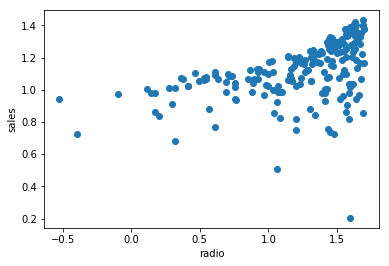

In [29]:
plt.plot(df.radio, df.sales,ls ='', marker='o',)
plt.xlabel("radio") # x-axis
plt.ylabel("sales") # y-axis

In [30]:
y = df['sales']
y.head()
df = df.drop('sales', axis =1)
df.head()

,TV,radio,newspaper
0,2.361917,1.577492,1.840106
1,1.648360,1.594393,1.654177
2,1.235528,1.661813,1.840733
3,2.180413,1.615950,1.767156
4,2.257198,1.033424,1.766413


In [31]:
df.isnull().any()

TV           False
radio        False
newspaper    False
dtype: bool

In [45]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df,y, test_size=0.20)

In [46]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
print(linreg.intercept_)
print(linreg.coef_)
names = df.columns.values 
names
#feature_names = list(features_df.columns.values)
#(zip(names,linreg.coef_))

0.19156394918811515
[0.3482049  0.16062398 0.01612981]


array(['TV', 'radio', 'newspaper'], dtype=object)

In [48]:
names = df.columns.values 
names

array(['TV', 'radio', 'newspaper'], dtype=object)

In [49]:
Y_pred = linreg.predict(X_test)
Y_pred

array([1.09959873, 1.26670678, 0.84191058, 1.0957329 , 1.33762594,
       1.30063871, 1.30353633, 1.22367331, 1.168443  , 0.97453238,
       1.13797399, 1.22656176, 0.97031254, 1.02136049, 1.05676166,
       1.18618278, 1.13117535, 1.30801108, 1.07947476, 1.27870978,
       1.05650298, 1.00941959, 1.09248096, 1.32923164, 1.12137876,
       1.18425126, 1.33948555, 1.29720875, 1.02401936, 0.82029705,
       1.09639205, 1.29269425, 1.01305441, 1.25294433, 1.19075924,
       1.01352247, 1.20232091, 1.21073834, 1.28666303, 1.32314295])

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#df = df.drop('sales', axis =1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif

,VIF Factor,features
0,10.093801,TV
1,7.584447,radio
2,9.403280,newspaper


Although we have reasonably high multicollinearlity, having only three variables means
we cannot simply remove things, as it increases the error tremendously

In [38]:
from sklearn import metrics
print(metrics.mean_absolute_error(Y_test,Y_pred))
print(metrics.mean_squared_error(Y_test,Y_pred))
print(sqrt(metrics.mean_absolute_error(Y_test,Y_pred)))

0.03189685584282324
0.0017244119666480935
0.17859690882773765


In [51]:
Y_pred_max = max(Y_pred)
Y_pred_max

1.3394855450787968

In [52]:
Y_pred_min = min(Y_pred)
Y_pred_min

0.8202970472824437

Hence final values are 

x1+x2+x3 = 100,000 or 6(log base 10 value)

1.3394855450787968 = 0.19156394918811515 + x1(0.3482049) + x2(0.16062398) +x3(0.01612981)
= 1.14792159589

0.8202970472824437 = 0.19156394918811515 + x1(0.3482049) + x2(0.16062398) +x3(0.01612981) 
= 0.62873309809